In [29]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

print (X_iris.shape, y_iris.shape)
print (X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [30]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

X, y = X_iris[:, :2], y_iris

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(112, 2) (112,)


Text(0, 0.5, 'Sepal width')

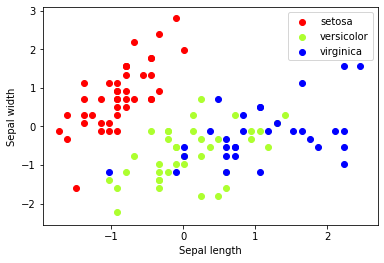

In [31]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


In [32]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)


print (clf.coef_)
print (clf.intercept_)

[[-26.23941991  10.68314232]
 [  1.13837053  -7.72308699]
 [  5.72344877  -0.91150735]]
[-17.51275684  -1.14175643  -2.72028834]


[0]


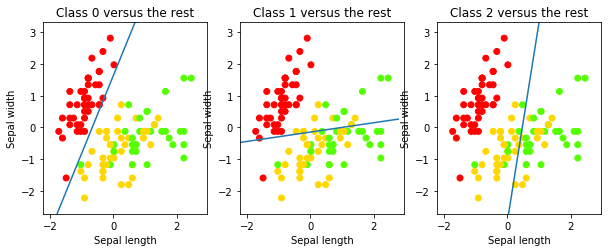

In [33]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
     axes[i].set_aspect('equal')
     axes[i].set_title('Class '+ str(i) + ' versus the rest')
     axes[i].set_xlabel('Sepal length')
     axes[i].set_ylabel('Sepal width')
     axes[i].set_xlim(x_min, x_max)
     axes[i].set_ylim(y_min, y_max)
     plt.sca(axes[i])
     plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
     ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
     plt.plot(Xs, ys)

print (clf.predict(scaler.transform([[4.7, 3.1]])))

In [34]:
print (clf.decision_function(scaler.transform([[4.7, 3.1]])))  

[[ 16.43842355  -3.22804059 -10.00599146]]


In [35]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print (metrics.accuracy_score(y_train, y_train_pred))

0.7946428571428571


In [36]:
y_pred = clf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.7368421052631579


In [37]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.53      0.73      0.62        11
   virginica       0.80      0.63      0.71        19

    accuracy                           0.74        38
   macro avg       0.78      0.79      0.77        38
weighted avg       0.76      0.74      0.74        38



In [38]:
print (metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  8  3]
 [ 0  7 12]]


In [39]:
print("My name is {Wanrong Cai}")
print("My NetID is: {wanrong2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Wanrong Cai}
My NetID is: {wanrong2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
